# Regression and Regularisation 

In [5]:
% pylab inline
import wget
figsize(10, 8)

Populating the interactive namespace from numpy and matplotlib


## Linear regression

Get the following little data set which contains one-dimensional data vectors $\mathbf{x}$ and $\mathbf{t}$.  They are stored as two columns, which the following cell splits into two vectors, <code>x</code> and <code>t</code>

In [53]:
import wget
try: 
    X = loadtxt('linreg.txt')
except IOError:
    wget.download('http://empslocal.ex.ac.uk/people/staff/reverson/ECM3420/linreg.txt')
    X = loadtxt('linreg.txt')

print(X.shape)
x = X[:,0]
t = X[:,1]

(20, 2)


  The data were generated
  according to
  \begin{equation*}
    t_n = w_0 + w_1 x_n + \epsilon_n
  \end{equation*}
  where $\epsilon_n$ is Gaussian-distributed noise: $\epsilon_n \sim
  \mathcal{N}(0, \sigma^2)$. Use linear regression to identify the coefficients
  $w_0$ and $w_1$.  Recall that to do this you need to set up a
  *design matrix* $\mathbf{X}$ that contains the features and the dummy
  feature $1$ to go with the bias coefficient $w_0$; thus
  \begin{align*}
    \mathbf{X} =
    \begin{bmatrix}
      1 & x_1\\
      1 & x_2\\
      1 & x_3\\
      \vdots & \vdots\\
      1 & x_N
    \end{bmatrix}
  \end{align*}
  With $\mathbf{X}$ on hand, you can find the coefficients from:
  \begin{align*}
    \mathbf{w} = \mathbf{X}^\dagger \mathbf{t}
  \end{align*}
  where  $\mathbf{t}$ is the vector of the targets and $\mathbf{X}^\dagger$ is the
  pseudo-inverse of $\mathbf{X}$. Use <code>np.linalg.pinv</code> or 
  construct it yourself as $\mathbf{X}^\dagger = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T$ -- see the lecture slides.
  
Plot the data and the
  regression line.  Measure the correlation between the features and
  targets.  How does it relate to the coefficients?

  Estimate the variance of the noise by finding the variance of the
  differences between your prediction of the targets and the actual
  targets.  Thus if $y_n = w_0 + w_1 x_n$ is the prediction of the $n$th
  target, then you could estimate the variance $\sigma^2$ as:
  \begin{align*}
    \sigma^2 = \frac{1}{N} \sum_{n=1}^N (t_n - y_n)^2
  \end{align*}
  Does your estimate of the variance make sense in terms of the average
  deviation of the targets from the prediction?

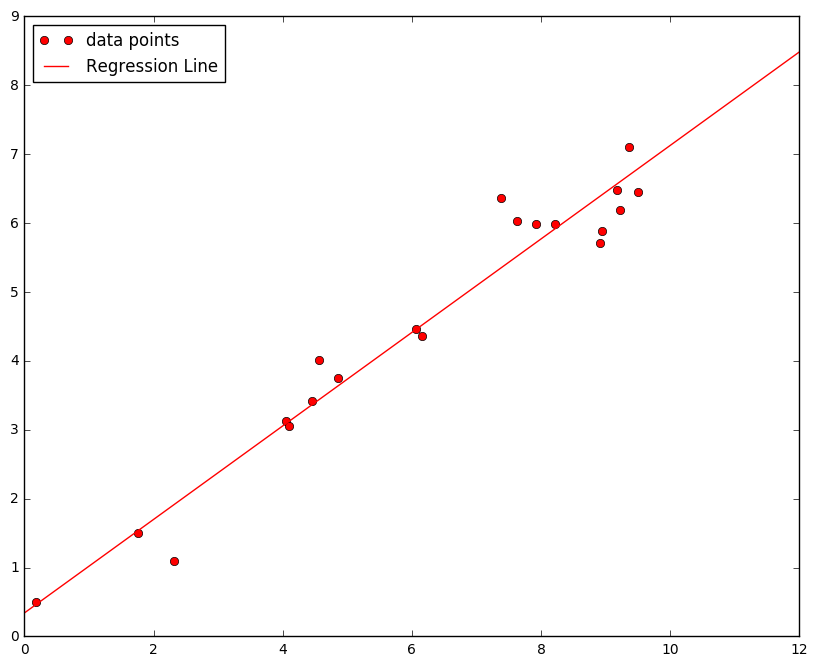

In [54]:
#Design Matrix
Z = ones((20,2), dtype=float)
Z[:,1] = x
w = (inv(Z.T @ Z) @ Z.T) @ t

reg = zeros( (2,2), dtype=float)
i = 0
for r in [0, 12]:
    reg[i,0] = r
    reg[i,1] = (w[1]*r)+w[0]
    i += 1

plot( X[:,0], X[:,1], 'ro', label='data points')   
plot(reg[:,0], reg[:,1], 'r', label='Regression Line')
legend( loc=2 )

In [55]:
print( 'Regression Line weights:')
print( w )
print( 'Correlation features:')
print( np.corrcoef( X.T ))

Regression Line weights:
[ 0.34152729  0.67868361]
Correlation features:
[[ 1.          0.97515055]
 [ 0.97515055  1.        ]]


** How do the weights and the correlation relate **

The correlation of the features indicate how dependant the target values are on the feature values. The higher the value of the correlation the greater the confidence in the regression line. 

In [56]:
# Variance
variance = 0
for i in range( X.shape[0] ):
    y = (w[1]*x[i])+w[0]
    variance += (t[i] - y)**2
    
variance = variance/X.shape[0]
print( variance )

0.180173702915


** Does the variance make sense? **

Yes, the error is rather small as the data is highly correlated.

## Robust linear regression

Standard regression analysis minimises the  squared
error between the regression line and the data, namely:
\begin{equation*}
    E_2(\mathbf{w}) = \sum_{n=1}^N (t_n - y_n(\mathbf{x}; \mathbf{w}) )^2
  \end{equation*}
  where $y_n(\mathbf{w}) = w_0 + w_1 x_n$ and $\mathbf{w} = (w_0, w_1)$. Recall that the
  sum of squares error function $E_2$ comes from the negative log
  likelihood and the assumption that the errors are normally (Gaussian) distributed.

A heavy-tailed distribution that is more appropriate if there are
  occasional large deviations from the systematic trend is the Laplacian
  distribution:
  \begin{align*}
    p(\epsilon_n) = p(t_n \,|\, \mathbf{x}_n, \mathbf{w}) \propto \exp
    \left\{
      - \frac{| \epsilon_n | }{\sigma}
    \right\}
  \end{align*}
Substitute this expression for $p(t_n \,|\, \mathbf{x}_n, \mathbf{w})$ into the
  general expression for an error function $E(\mathbf{w}) = -\sum_{n=1}^N \log
  p(t_n \,|\, \mathbf{x}_n, \mathbf{w}) $ to show that the error function that arises
  from this noise distribution is
  \begin{equation*}
    E_1(\mathbf{w}) = \sum_{n=1}^N |t_n - y_n(\mathbf{x}; \mathbf{w}) |
  \end{equation*}


Please use the LaTeX mark-up to display the derivation.  You may find cutting and pasting from this cell convenient.

** Proof **



First definition:

$
    p(\epsilon_n) = p(t_n \,|\, \mathbf{x}_n, \mathbf{w}) \propto \exp
    \left\{
      - \frac{| \epsilon_n | }{\sigma}
    \right\}
$

Error Function:

$
    E(w) = - \sum_{n=1}^N \log p(t_n \,|\, \mathbf{x}_n, \mathbf{w})
$

Substituting the first definition into the error function:

$
    \qquad = - \sum_{n=1}^N \log exp
    \left\{
      - \frac{| \epsilon_n | }{\sigma}
    \right\}
$

We can resolve the log of the exponent to give:

$
   \qquad  = - \sum_{n=1}^N - \frac{ | \epsilon_n | }{\sigma}
$

Substatuting in for $ \epsilon_n $

$
   \qquad  = - \sum_{n=1}^N - \frac{ | t - y(\mathbf{x};\mathbf{w}) | }{\sigma}
$

We can then take the $ \frac{ -1}{\sigma} $ outside the sum to get:

$
    \qquad = \frac{ 1 }{\sigma}\sum_{n=1}^N | t - y(\mathbf{x};\mathbf{w}) | 
$

If we ignore the constant $ \frac{ 1 }{\sigma} $ we can see they are equivilent:

$
    E(w) \equiv E_1(w)
$

Due to the fact that all errors are to be subject to the same constant, and the aim is to compare errors to find the best values for w, it is of little concern to remove $ \frac{ 1 }{\sigma} $ from the equation as by doing so we are only scaling all error values equally.

The file <code>outlier.txt</code> contains the same data as the one-dimensional linear regression data that you have just been using, but with one target value to be far from the general trend in the data.  You can download it and split it into features and targets with the following.

In [57]:
try: 
    X = loadtxt('outlier.txt')
except IOError:
    wget.download('http://empslocal.ex.ac.uk/~reverson/ECM3420/outlier.txt')
    X = loadtxt('outlier.txt')
print(X.shape)
x = X[:,0]
t = X[:,1]


(20, 2)


Plot $t_n$ versus $x_n$ and find the
  linear regression line for these data using $E_2$. Notice how the
  regression line is grossly affected by the single outlier.


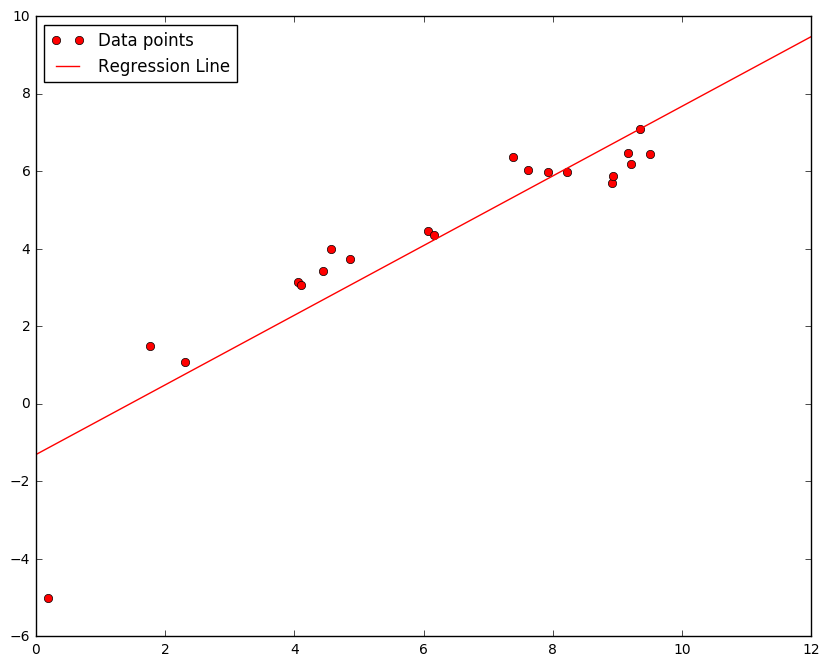

In [58]:
Z = ones((20,2), dtype=float)
Z[:,1] = x
w = (inv(Z.T @ Z) @ Z.T) @ t

reg = zeros( (2,2), dtype=float)
i = 0
for r in [0, 12]:
    reg[i,0] = r
    reg[i,1] = (w[1]*r)+w[0]
    i += 1

plot( x, t, 'ro', label='Data points')   
plot(reg[:,0], reg[:,1], 'r', label="Regression Line")
legend( loc=2 )

Write a
  routine to fit a find a straight fitting the data by minimising
  $E_1(\mathbf{w})$.  Note that the pseudo-inverse will not work here.  One
  possibility is to find the minimum error by trying a grid of combinations
  of $w_0$ and $w_1$.  From your plot of the data you should be able to
  estimate appropriate ranges of $w_0$ (the intercept) and $w_1$ (the
  gradient) to search.   If you adopt this approach it is nice to plot a
  contour or <code>pcolor</code> representation of $E_1(\mathbf{w})$ as a function of
  $w_0$ and $w_1$.

   Plot and compare your fitted line with the line derived from the
  squared error (all on the same graph).

  Searching a grid like this works well when there are just two
  coefficients to be found, but is computationally very expensive when
  there are many. An alternative is to use a numerical minimiser such as
  <code>scipy.optimize.fmin</code> to locate the minimum -- you might start the search
  at the solution to the $E_2$ problem.  For example, the following cell will minimise the bannana function of two variables from the starting point <code>x0</code>.

In [59]:
import scipy.optimize

def banana(x):
     return 100*(x[1]-x[0]**2)**2+(1-x[0])**2

xopt = scipy.optimize.fmin(func=banana, x0=[-1.2,1])


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 85
         Function evaluations: 159


In [60]:
def errorOne( w ):
    error = 0
    for i in range( x.shape[0] ):
        error += abs( t[i] - ((w[1]*x[i])+w[0]) )
    return error

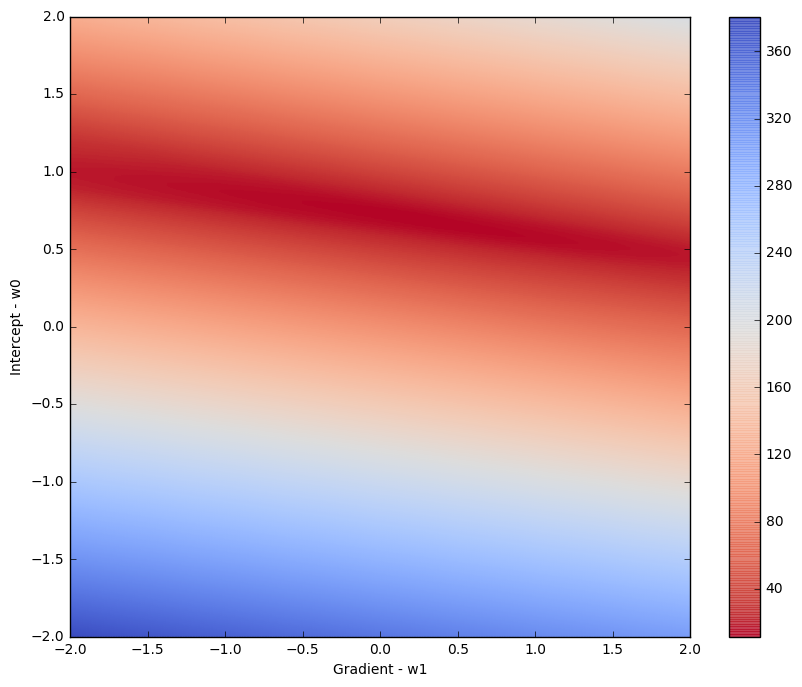

In [61]:
# Visualisation of the Error values given by the error one algorithm
intercept_list = linspace(-2, 2, 1000)
gradient_list = linspace( -2, 2, 1000)
predictions = zeros( (1000, 1000) )

for i_index, intercept in enumerate(intercept_list):
    for g_index, gradient in enumerate(gradient_list):
        predictions[g_index][i_index] = errorOne( [intercept, gradient] )
        
pcolor(gradient_list, intercept_list, predictions, cmap=cm.coolwarm_r, alpha=0.8)
xlabel( 'Gradient - w1' )
ylabel( 'Intercept - w0' )
colorbar()

Optimization terminated successfully.
         Current function value: 11.598136
         Iterations: 44
         Function evaluations: 81


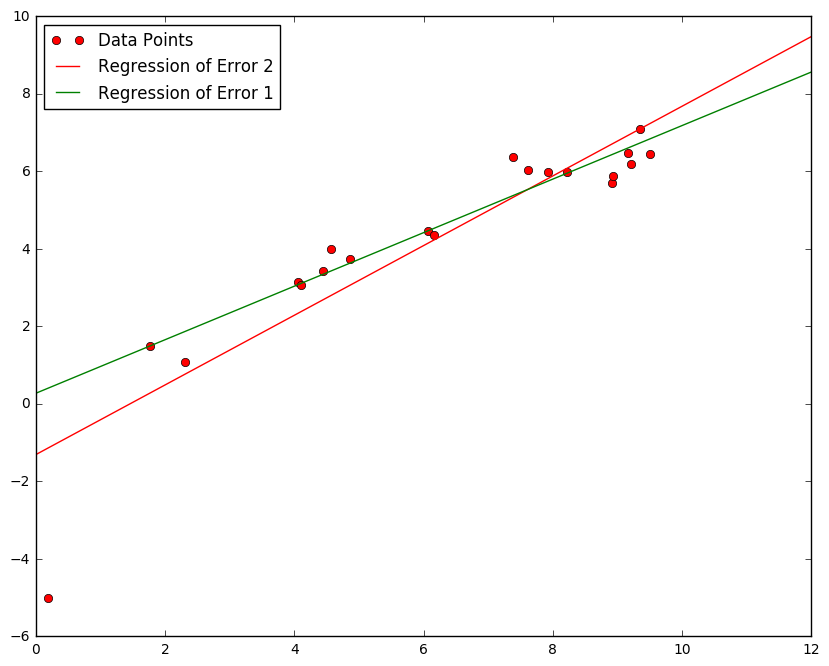

In [62]:
# Quickly determining w1 
w1 = scipy.optimize.fmin( func=errorOne , x0 = w )

reg1 = zeros( (2,2), dtype=float)
i = 0
for r in [0, 12]:
    reg1[i,0] = r
    reg1[i,1] = (w1[1]*r)+w1[0]
    i += 1

plot( x, t, 'ro', label='Data Points')   
plot(reg[:,0], reg[:,1], 'r', label='Regression of Error 2')
plot(reg1[:,0], reg1[:,1], 'g', label='Regression of Error 1')
legend( loc=2 )

Note how the $E_1$ regression line passes close to the majority of the data because the outlier carries less weight than in the $E_2$ case.

## Radial basis function regression

Here is the demonstration of radial basis functions that I showed in a lecture with a couple of modifications.

The first cell just defines a generator that produces colours in turn, which is useful for plotting later.

In [63]:
from itertools import cycle
colour = cycle("bgrcmyk")

output = ''
for i in range(10):
    output += next(colour) + '->'
print( output[:-2] )

b->g->r->c->m->y->k->b->g->r


### Make some data

In [64]:
N = 20
xtr = rand(N)*3
xtr[:N//2] += 4
xtr = sorted(xtr)         # Sorting helps visualise the design matrix later
ttr = sin(xtr) + randn(N)*0.2

xte = rand(N)*3
xte[:N//2] += 4
xte = sorted(xte)         # Sorting helps visualise the design matrix later
tte = sin(xte) + randn(N)*0.2

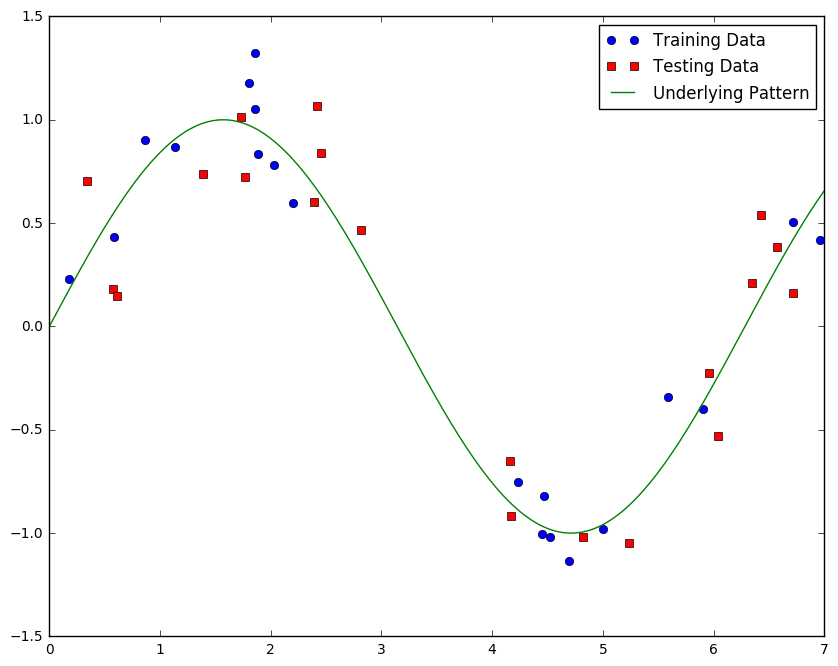

In [65]:
plot(xtr, ttr, 'bo', label='Training Data')
plot(xte, tte, 'rs', label='Testing Data')
xx = linspace(0, 7, 200)
plot(xx, sin(xx), 'g', label='Underlying Pattern')
legend( loc=1 )

### Define radial basis functions

\begin{align*}
\phi(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left\{-x^2/(2\sigma^2)\right\}
\end{align*}

In [66]:
def phi(x, c, sigma=0.1):
    """Radial basis function centred at c with "radius" sigma"""
    return exp(-(x-c)**2/(2*sigma**2))/(sqrt(2*pi)*sigma)

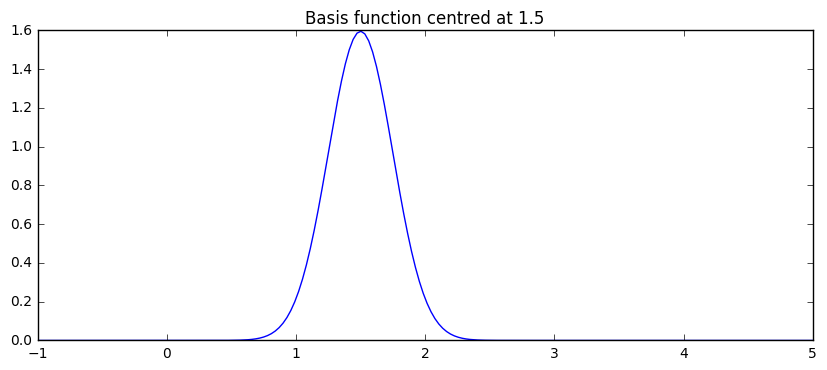

In [67]:
def plot_phi():
    x = linspace(-1, 5, 200)
    c = 1.5
    plot(x, phi(x, c, 0.25))
    title('Basis function centred at %g' % c)
figure(figsize=(10,4))
plot_phi()

### Choose centres and find the activations

In [68]:
# We could choose the centres randomly, but here we'll choose 
# every other one to get an even spread
M = 10
I = np.random.choice(N, M, replace=False)
I = sorted(I)           # Only useful for plotting
print(I)


[0, 2, 7, 9, 10, 12, 15, 16, 18, 19]


Plot the centres $x_m$ and the activations of each of the data points $\phi(x_n-x_m)$.  Note how the activations are large only for the points close to a particular centre.

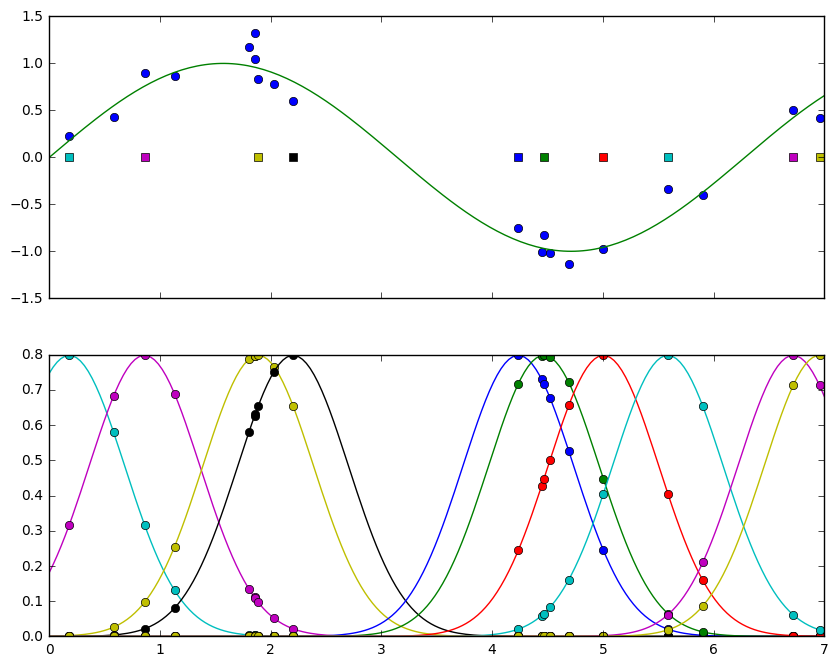

In [69]:
sigma = 0.5     # Choose the width of the basis functions

fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].plot(xtr, ttr, 'bo')
ax[0].plot(xx, sin(xx), 'g')


for i in I:
    colourLetter = next(colour)
    ax[1].hold(True)
    ax[1].plot(xx, phi(xx, xtr[i], sigma=sigma), c=colourLetter)
    activation = phi(xtr, xtr[i], sigma=sigma)
    ax[1].plot(xtr, activation, ls='', c=colourLetter, marker='o')
    ax[0].plot(xtr[i], 0.0, marker='s', c=colourLetter)

### Construct a design matrix


\begin{align*}
    \newcommand{\bx}{\mathbf{x}}
    \newcommand{\bX}{\mathbf{X}}
    \newcommand{\bw}{\mathbf{w}}
      \bX =
      \begin{bmatrix}
        1 &\phi_1(\bx_1) & \phi_2(\bx_1) & \ldots & \phi_M(\bx_1)\\
        1& \phi_1(\bx_2) & \phi_2(\bx_2) & \ldots & \phi_M(\bx_2)\\
        1 & \phi_1(\bx_3) & \phi_2(\bx_3) & \ldots & \phi_M(\bx_3)\\
        \vdots & & & & \vdots\\
        1 & \phi_1(\bx_N) & \phi_2(\bx_N) & \ldots & \phi_M(\bx_N)\\
      \end{bmatrix}
    \end{align*}


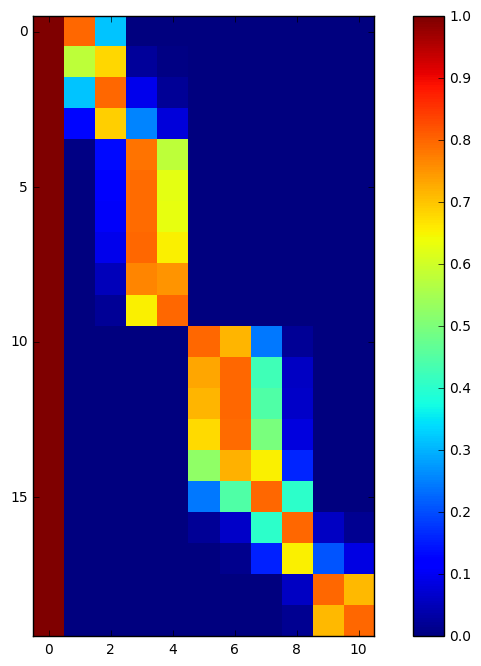

In [70]:
X = zeros((N,M+1))
X[:,0] = 1    # Bias
for m, i in enumerate(I):
    activation = phi(xtr, xtr[i], sigma=sigma)
    X[:,m+1] = activation

imshow(X, interpolation='nearest')
colorbar()

### Solve for the weights using the pseudo-inverse

In [71]:
w = np.linalg.pinv(X) @ ttr

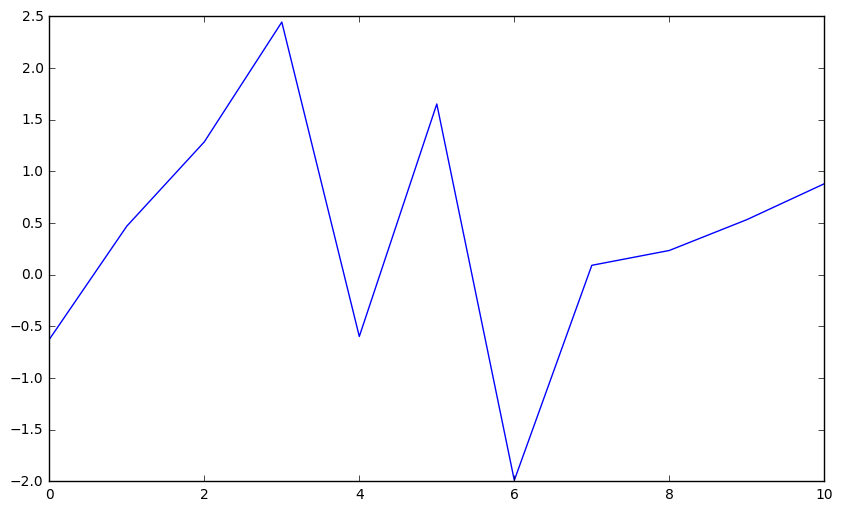

In [72]:
figure(figsize=(10,6))
plot(w)

### Predictions $y(x)$

\begin{align*}
   y(\mathbf{x}; \mathbf{w}) &= w_0 + \sum_{m=1}^M w_m \phi(\mathbf{w}-\mathbf{x}_m)\\
   &= w_0 + \sum_{m=1}^M w_m \phi_m(\mathbf{x})
\end{align*}

In [73]:
# Make predictions at lots of points to get a smooth curve
Npred = 200
xtest = linspace(0, 7, Npred)

X = zeros((Npred,M+1))
X[:,0] = 1    # Bias
for m, i in enumerate(I):
    activation = phi(xtest, xtr[i], sigma=sigma)
    X[:,m+1] = activation

ytest = X@w


(-4, 4)

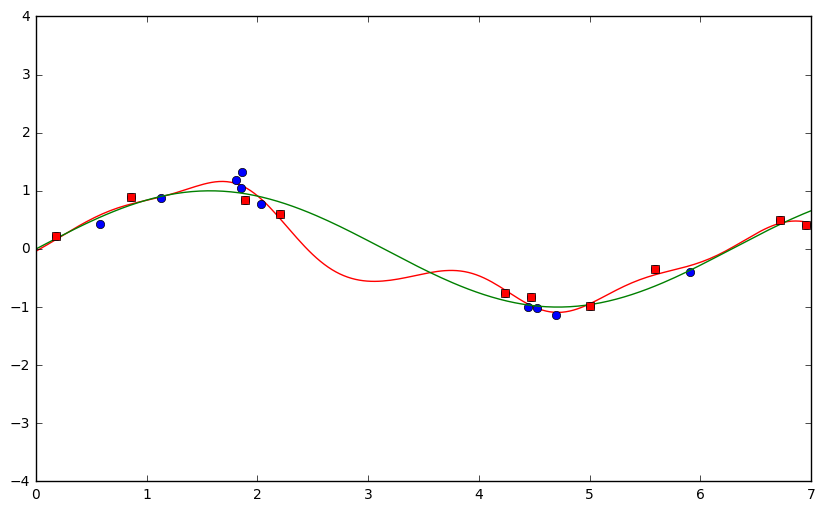

In [74]:
figure(figsize=(10,6))
plot(xtest, ytest, 'r')
plot(xtr, ttr, 'bo')
plot(xx, sin(xx), 'g')

for i in I:
    plot(xtr[i], ttr[i], 'rs')
ylim(ymin=-4, ymax=4)

### Exploring $\sigma$ and $M$

Using the above code as a model write a function

    rbf(xtr, ttr, xte, M, sigma)

that will use the training data <code>xtr</code> and <code>ttr</code> to make predictions for the features <code>xte</code>, using <code>M</code> centres and a width <code>sigma</code> for the radial basis functions.   Your function should return the predictions for <code>xte</code> and the vector of coefficients <code>w</code>.

Use your function to explore the effect of changing $M$ and $\sigma$.  What happens when they are large and small?  Plot both the predictions and the weights.  Notice that $\sigma$ has a smoothing effect when it is large and that poor predictions are made when $\sigma$ is too small.  Also explore what happens when $M$ is large (it can't be larger than the number of training points).  Notice that in this situation the weights can become very large in magnitude and if $\sigma$ is not large enough to provide lots of smoothing then the predictions are very poor where there is not much data.


In [75]:
 def rbf(xtr, ttr, xte, M, sigma, pplot=True):
    N = len(xtr)
    I = np.random.choice(N, M, replace=False)
    I = sorted(I)
    
    
    # Design matrix on training to find w coefficients
    act_xtr = ones((N,M+1))
    for m, i in enumerate(I):
        activation = phi(xtr, xtr[i], sigma=sigma)
        act_xtr[:,m+1] = activation 
    w = (inv(act_xtr.T @ act_xtr) @ act_xtr.T) @ ttr
    
    # Design matrix on testing to predict with respect to training w    
    act_xte = ones((N,M+1))
    for m, i in enumerate(I):
        activation = phi(xte, xtr[i], sigma=sigma)
        act_xte[:,m+1] = activation
    xte_pred = act_xte@w
    
    # For ploting the affect of training 
    Npred = 1000
    xtest = linspace(0, 7, Npred)
    X = ones((Npred,M+1))
    for m, i in enumerate(I):
        activation = phi(xtest, xtr[i], sigma=sigma)
        X[:,m+1] = activation
    ytest = X@w

    if pplot:
        figure(figsize=(10,6))
        plot(xtr, ttr, 'bs', label='Training Data')
        plot(xx, sin(xx), 'g', label='Underlying Pattern')
        plot(xte, tte, 'rs', label='Test Data')
        plot(xtest, ytest, 'r', label='Prediction')
        legend(loc=3)

        figure(figsize=(10,6))
        plot(w)
    
    return xte_pred, w

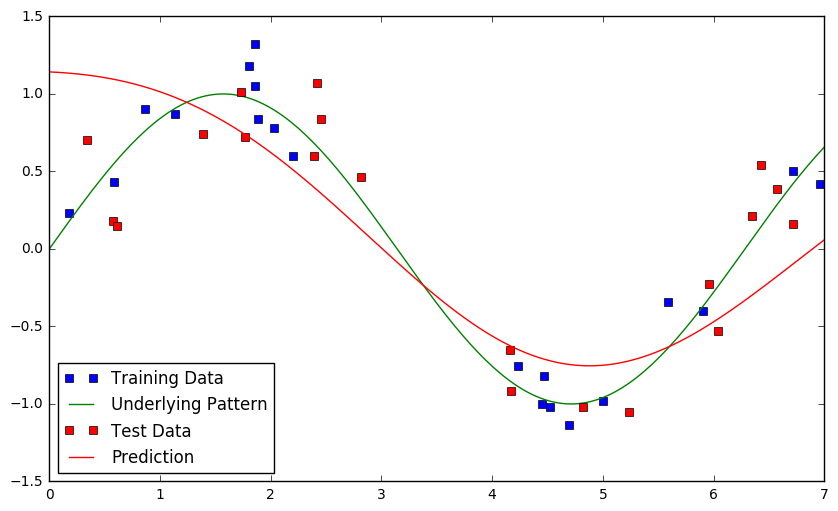

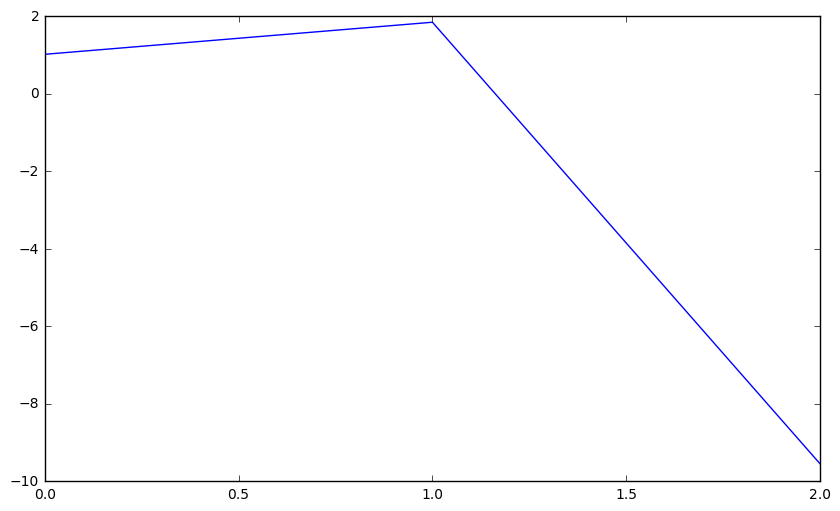

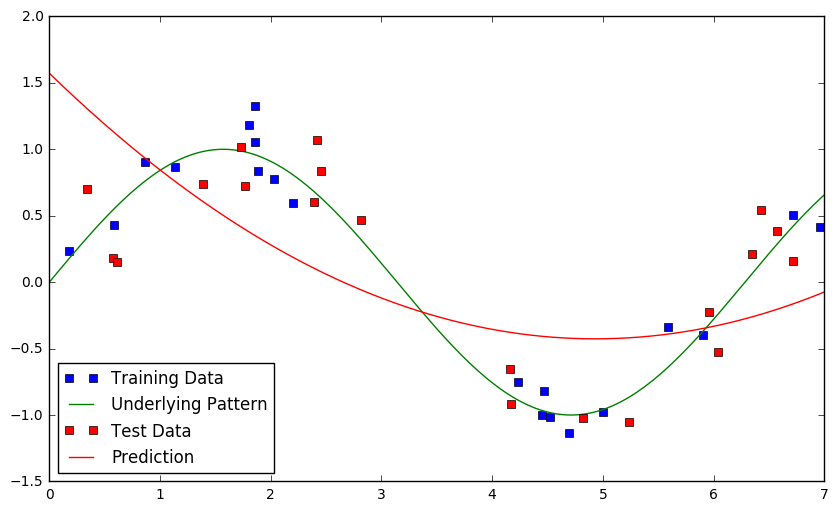

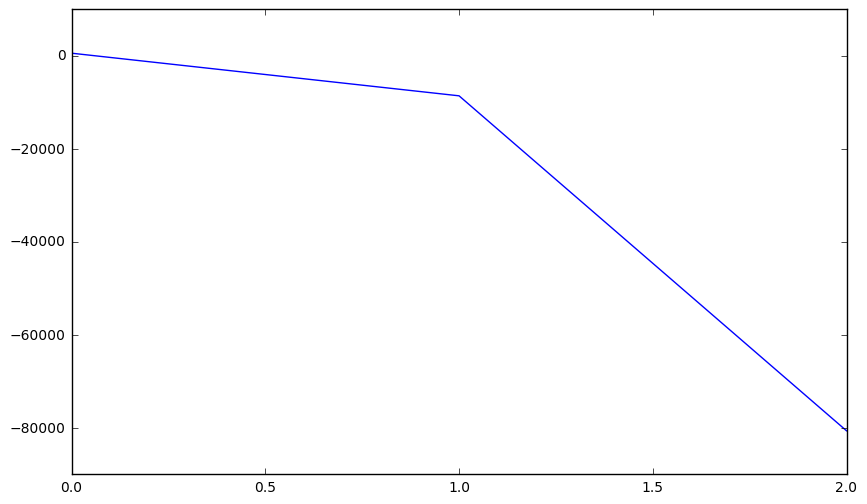

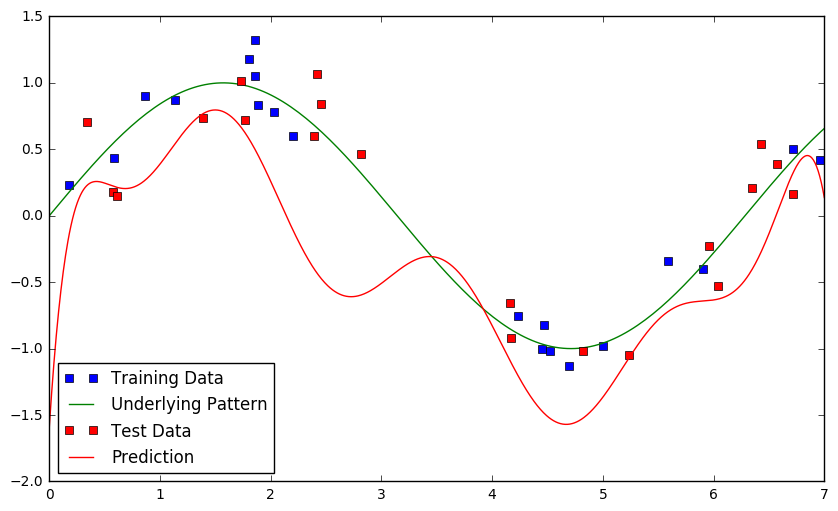

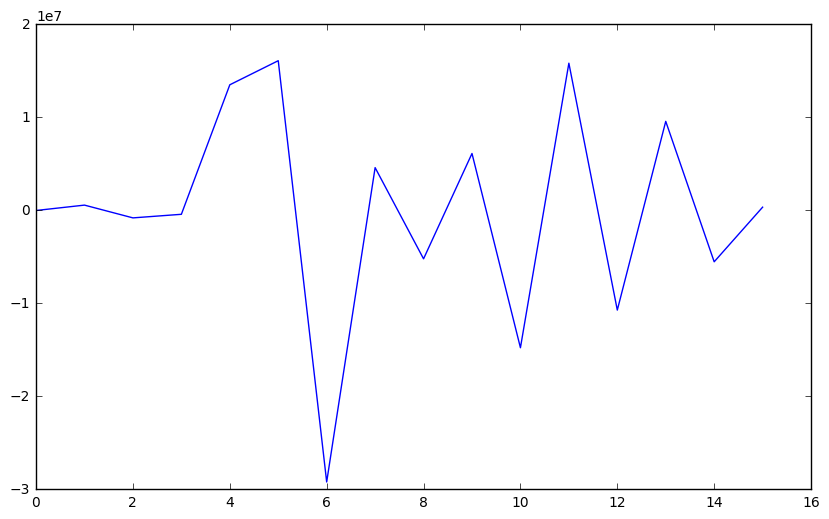

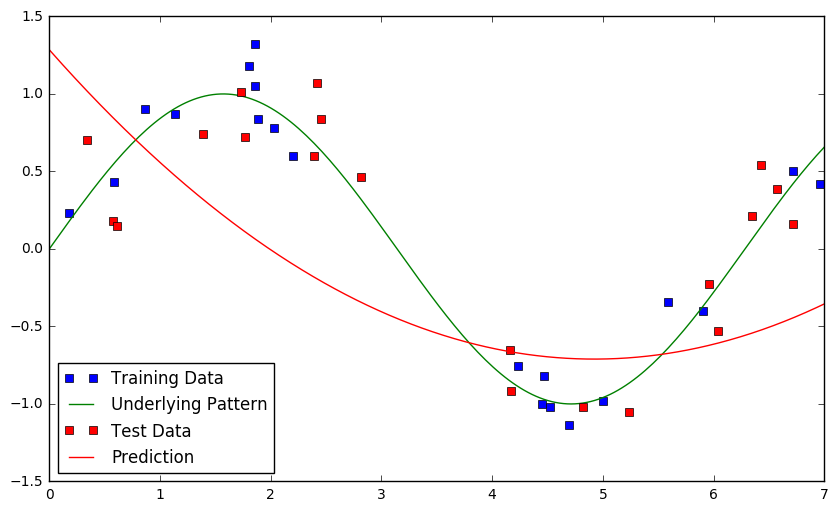

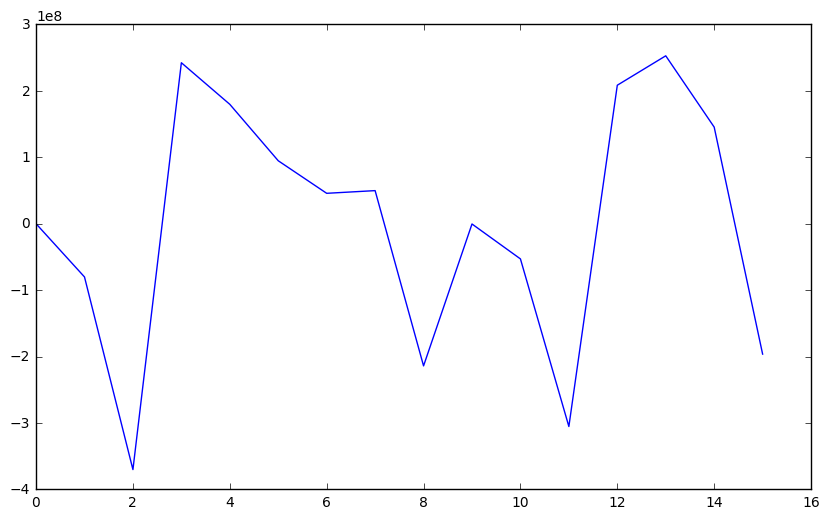

In [76]:
# Low value of m and sigma
returned = rbf( xtr, ttr, xte, 2, 2)
#low value of m, high value of sigma
returned = rbf( xtr, ttr, xte, 2, 60)
#high value of m, low value of sigma
returned = rbf( xtr, ttr, xte, 15, 2)
#high value of m and sigma
returned = rbf( xtr, ttr, xte, 15, 60)

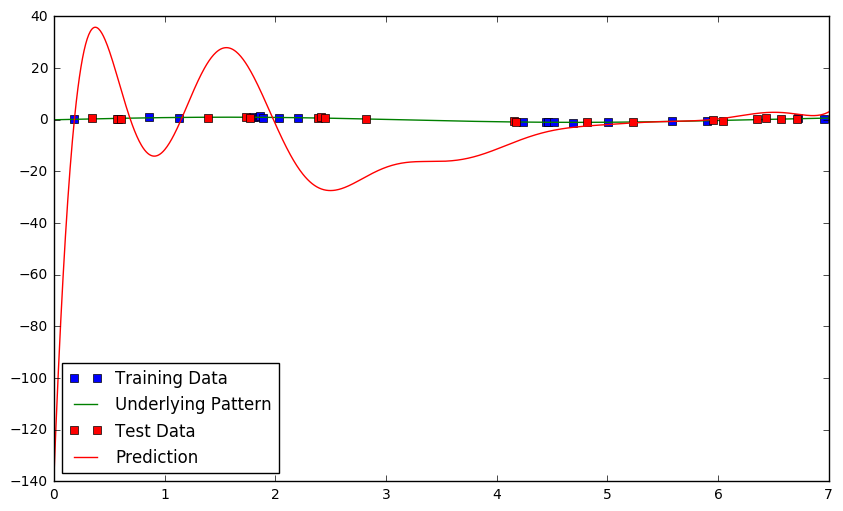

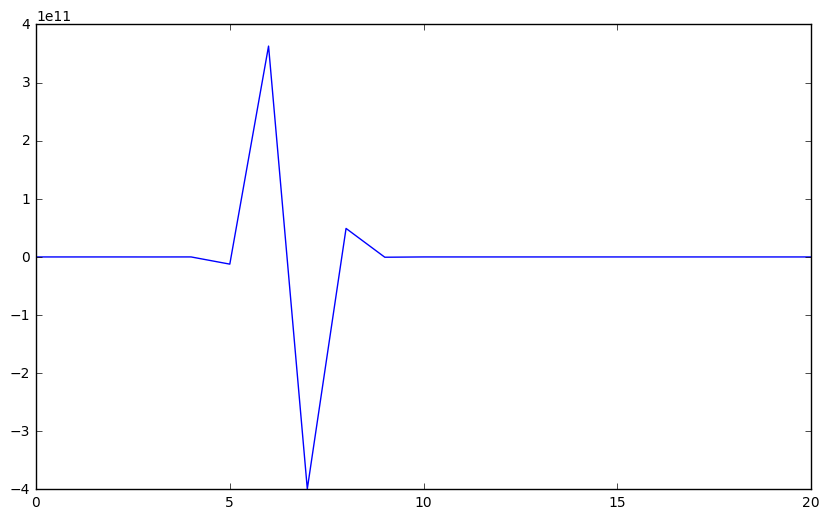

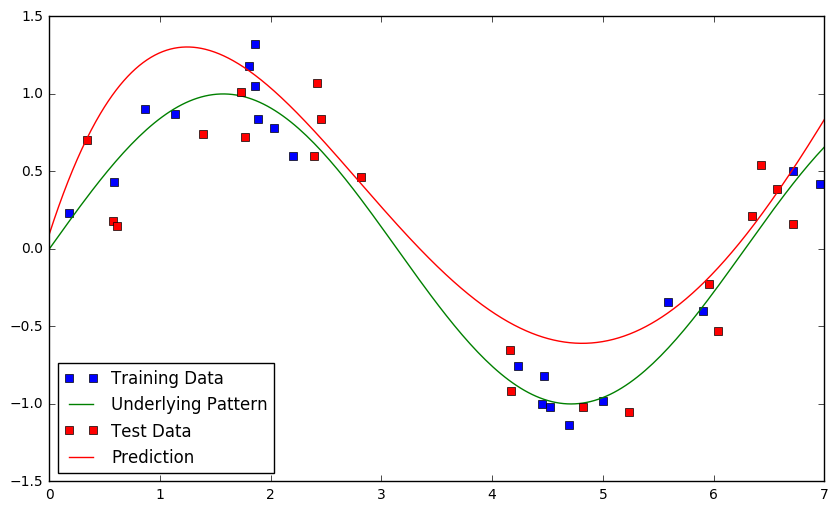

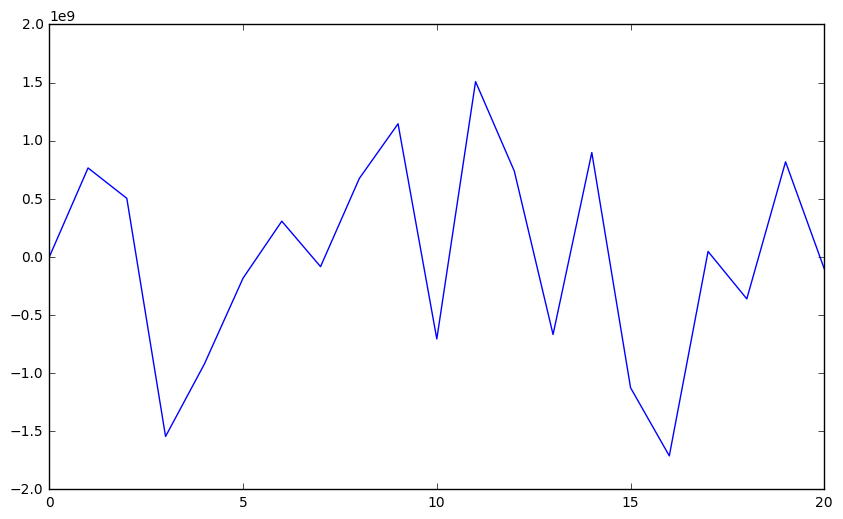

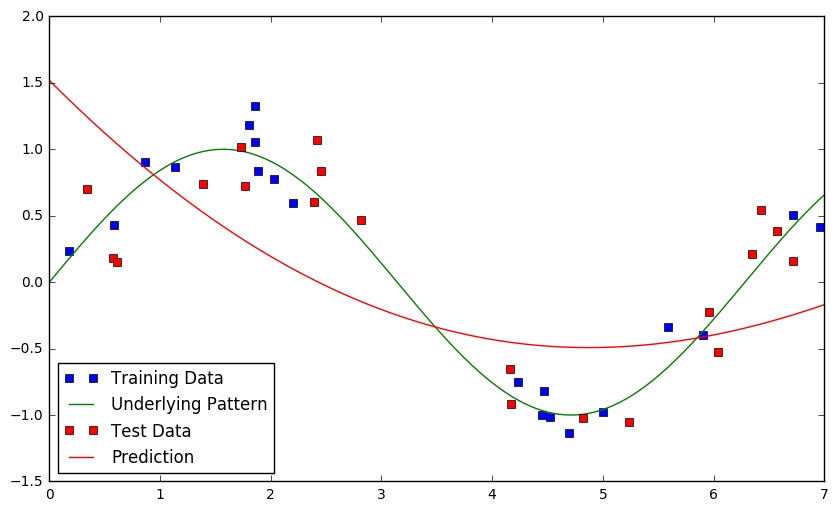

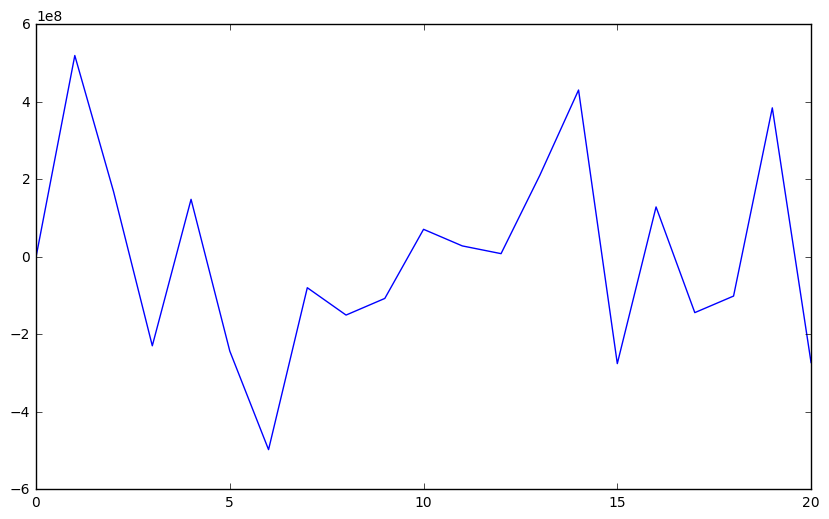

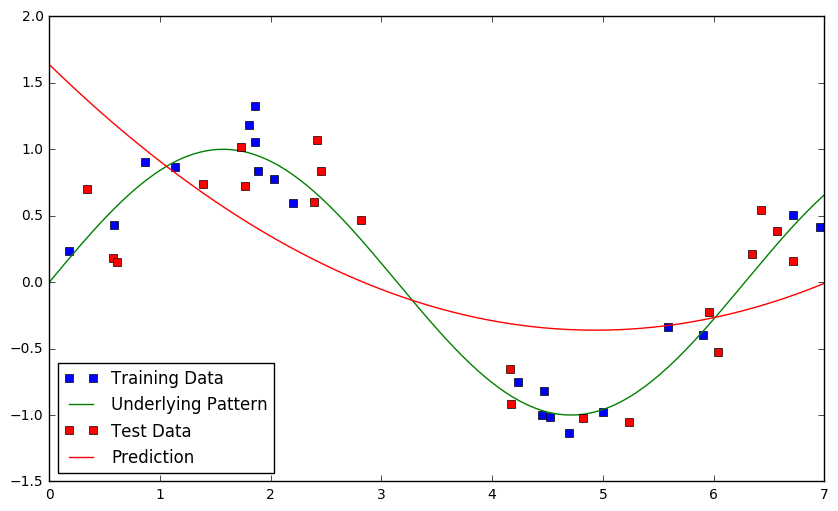

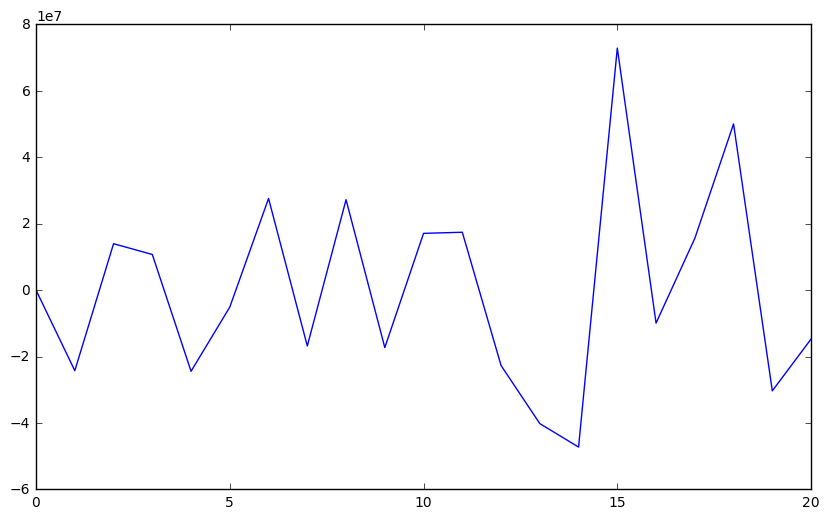

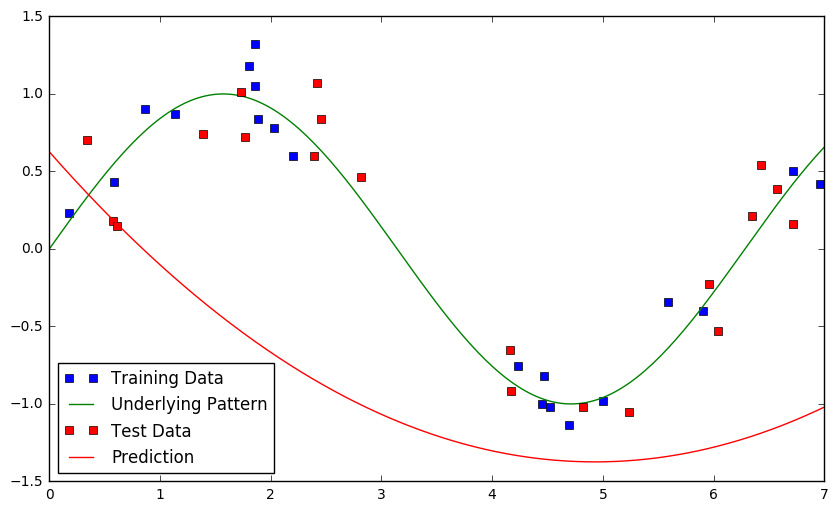

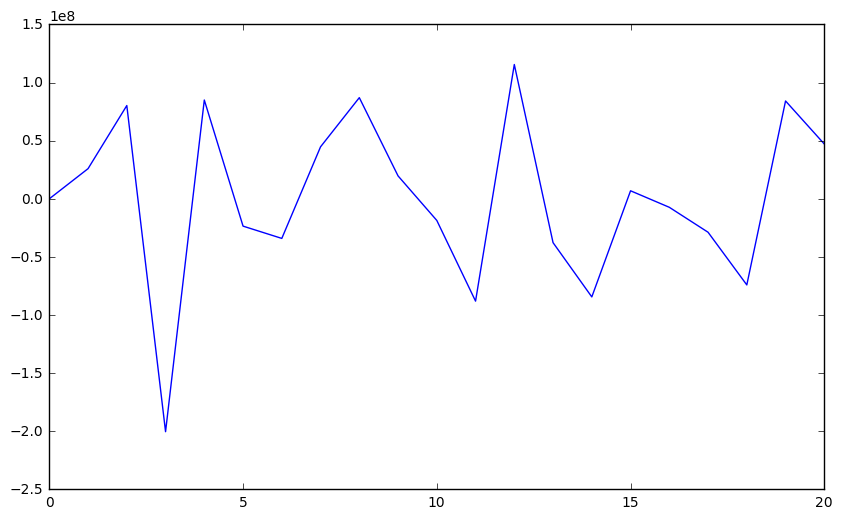

In [77]:
# Seeing effect of Sigma for fixed M
for i in linspace(1,100,5):
    rbf( xtr, ttr, xte, len(xtr), i )

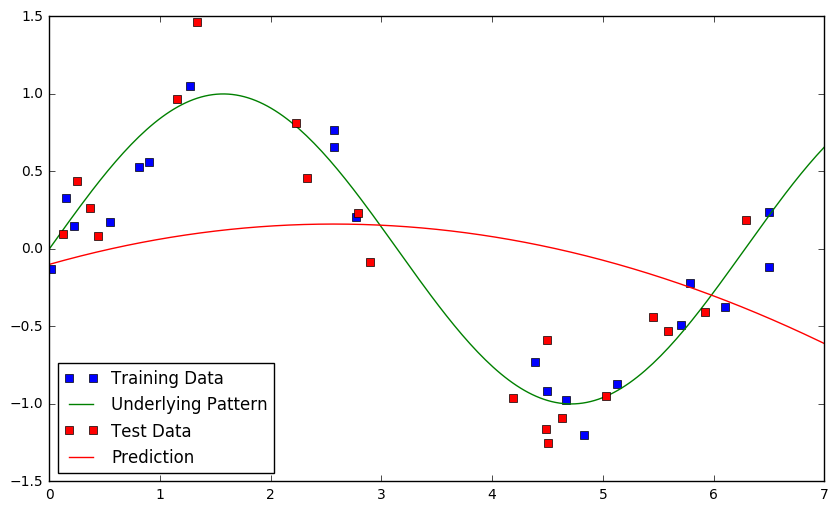

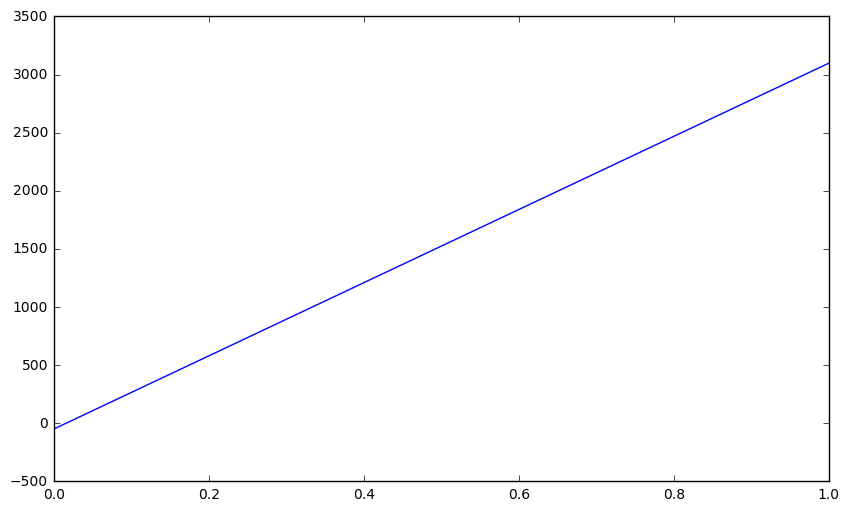

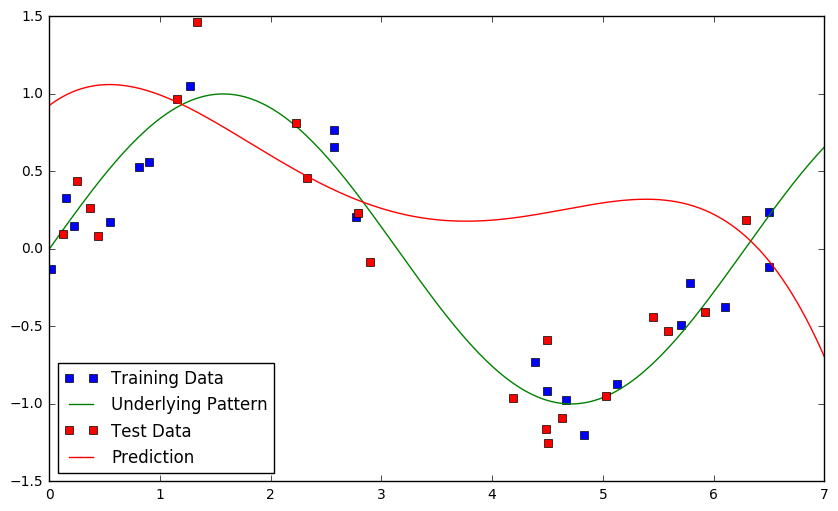

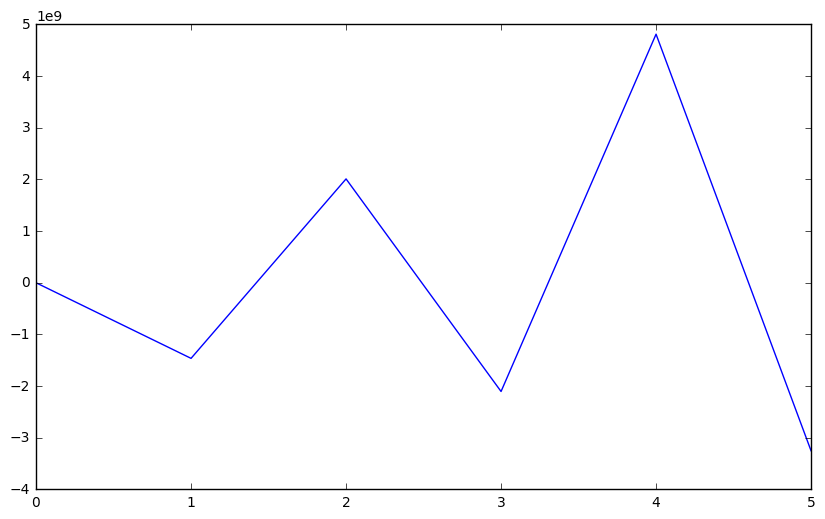

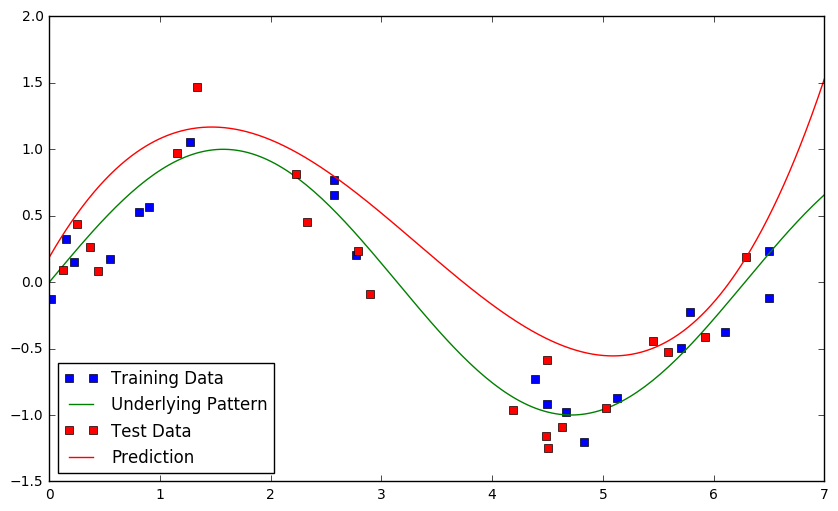

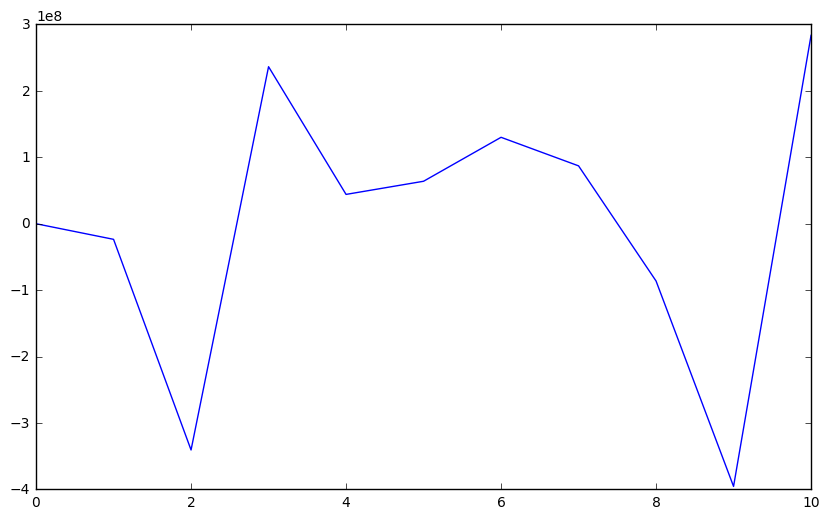

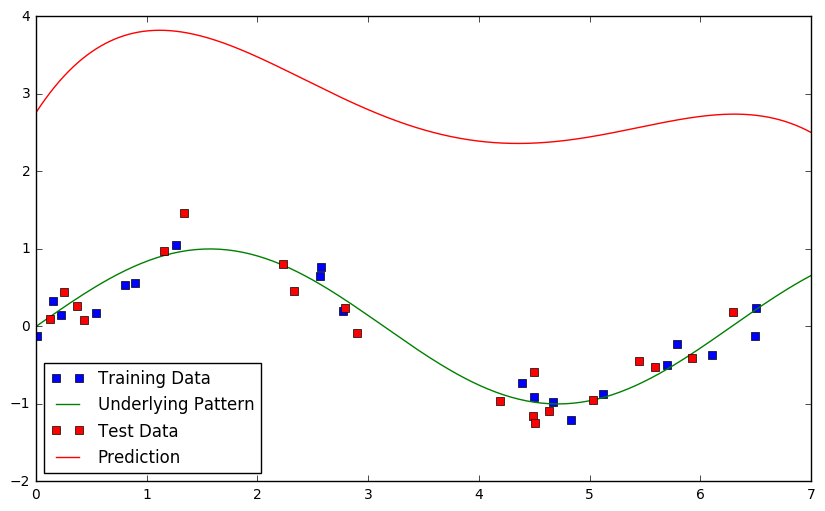

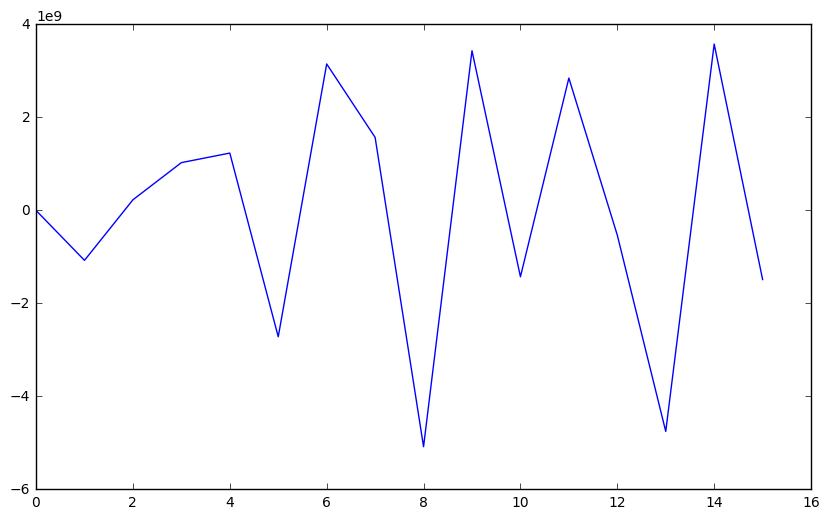

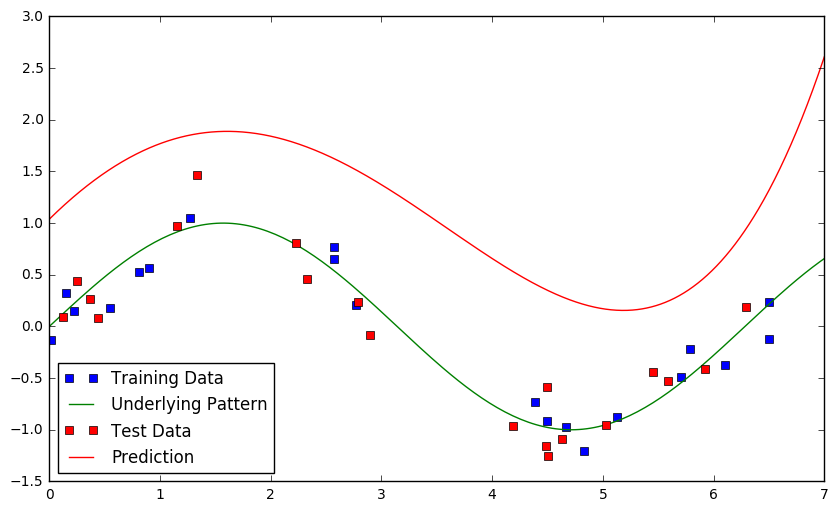

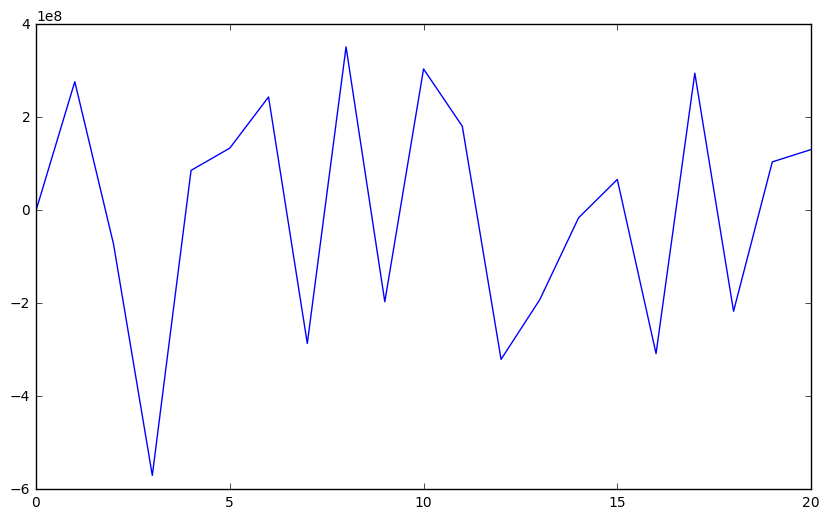

In [31]:
# Seeing the effect of M for fixed sigma
for i in linspace(1,20,5):
    rbf( xtr, ttr, xte, int(i), 25 )

Choosing a few centres uniformly at random, as we have done here, seems like a good idea because it should ensure that there are a basis functions covering every region of the feature space.  However, if we are unlucky the basis functions all end up close to each other, leaving other parts of the space without any coverage.  You may have noticed this happening as you experimented. Two alternatives to counter this are:

*  Cluster the data and place a basis function at the centre of each cluster.  Here we still have to choose the number of centres to use.

* Put a basis function on *every* point. This could be expensive with lots of data, but we won't need to worry about this.  However, the weights may become very large and the predictions very poor, particularly if $\sigma$ is small.

It would be nice to have a radial basis function regressor that didn't require us to choose $M$ and $\sigma$.  To achieve this we'll put a basis function on every training data point, removing the need to choose $M$.  A reasonable strategy for choosing $\sigma$ is to set it equal to a multiple of the average distance to neighbouring data points. 

Copy your <code>rbf</code> function to make a new function that chooses $M = N$ and $\sigma$ to be, say 10 times, the average distance to the nearest neighbours.  How well does this perform?  Quantify how well it does by calculating the root mean squared error on the test data.  Is 10 times the average nearest neighbour distance a reasonable choice?  

In [78]:
def rbfSimple(xtr, ttr, xte, multiple=10, pplot=True):
    
    sigma = 0
    for i in range( len(xtr) ):
        distances = []
        for j in range( len(xtr) ):
            if i == j: continue    
            dist = sqrt((xtr[i] - xtr[j])**2 + (ttr[i] - ttr[j])**2)
            distances.append( dist )
        
        sigma += min(distances)
    sigma = multiple*(sigma/len(xtr))
        
    return rbf( xtr, ttr, xte, len(xtr), sigma, pplot=pplot)

In [79]:
def predError( pred ):
    error = 0
    for i in range( x.shape[0] ):
        error += (abs( pred[i] - tte[i] ))**2
    return sqrt(error/x.shape[0])

In [80]:
print( 'Error value for regression line y = 0: ', predError( [0 for x in range(x.shape[0])] ))

Error value for regression line y = 0:  0.683000486722


Error on predicted for a multple of 10: 0.532869552873
Minimun Error found on predicted: 0.30697071267 with an multiple value of: 21
Error with a multiple of 10 was better than 68% of values between 1 and 100


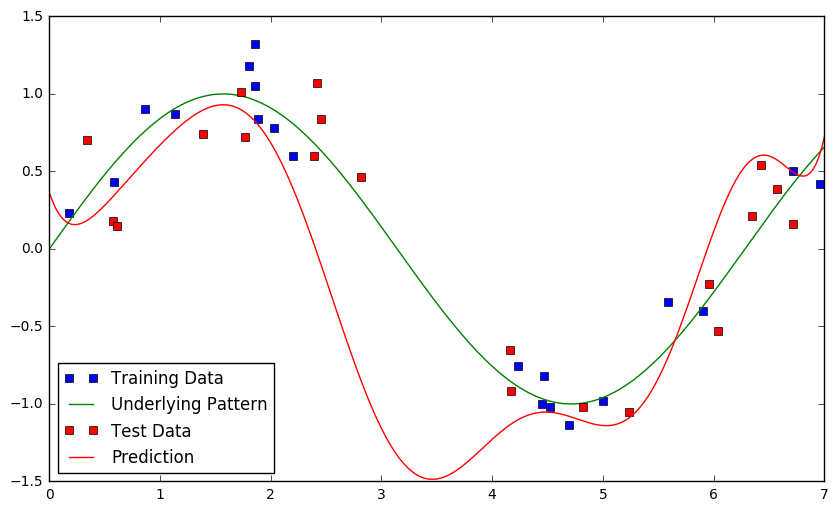

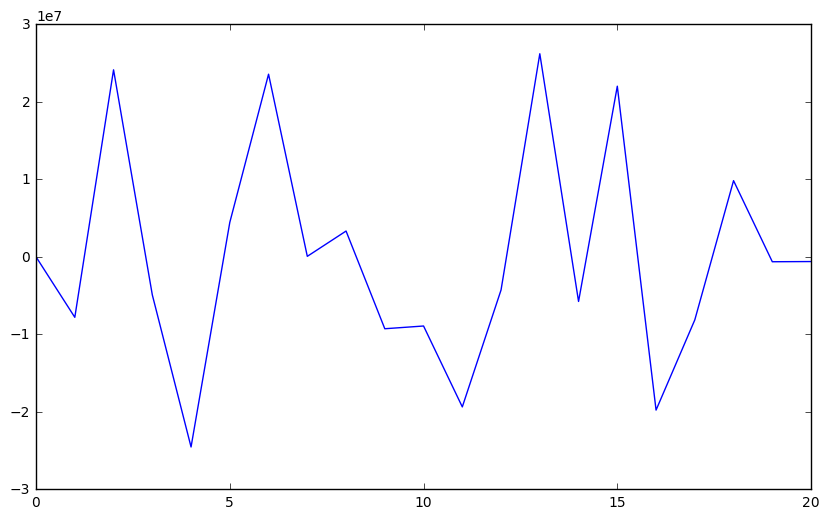

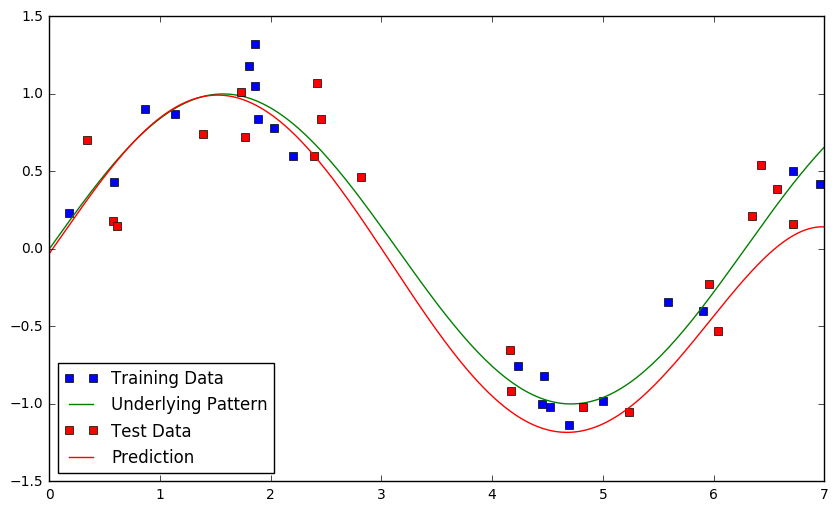

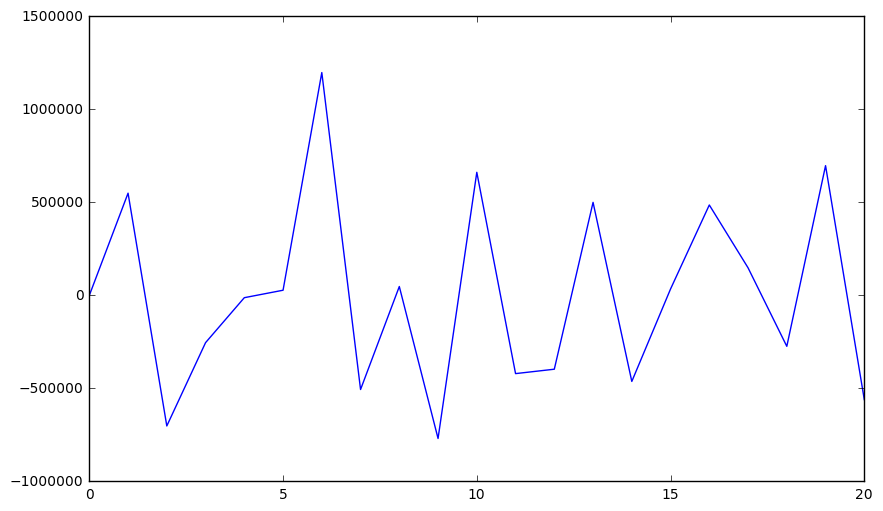

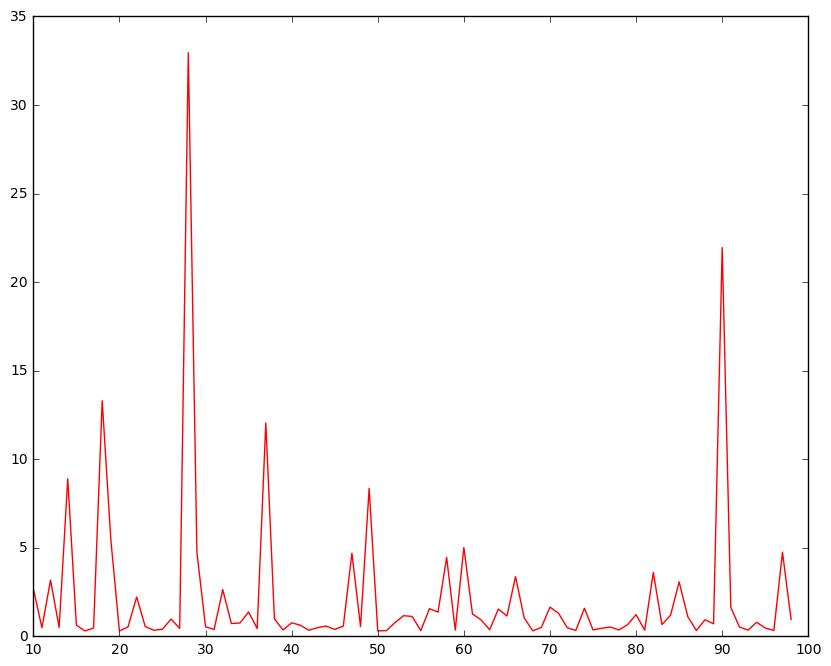

In [81]:
pred, w = rbfSimple( xtr, ttr, xte )
error10 = predError( pred )
print("Error on predicted for a multple of 10:", error10 )

list_of_error = []
for i in range( 1, 100 ):
    pred, w = rbfSimple( xtr, ttr, xte, i, pplot=False )
    list_of_error.append( predError( pred ) )

index = list_of_error.index(min(list_of_error))+1
pred, w = rbfSimple( xtr, ttr, xte, index )
errorBest = predError( pred )
print('Minimun Error found on predicted:', errorBest, 'with an multiple value of:', index)

count = 0
for i in range( len(list_of_error) ):
    if error10 <= list_of_error[i]:
        count += 1
        
percentage = str(int(count/len(list_of_error)*100 ))+'%'
print('Error with a multiple of 10 was better than', percentage, 'of values between 1 and 100')

figure()
plot( [10 + x for x in range(len(list_of_error[10:]))], list_of_error[10:], 'r')



** How well does a multiple value of 10 work for ploting the regression line? **

Looking at the results I have gotten out of my functions it would seem that a multiple value of 10 is *ok* . (Some random data spreads have gotten error values of 7+ which is terrible) Getting values between 1-5 normaly, it is by no means the best value to use however in comparaison to some of the error values I have observed, is small.

When considering the fact the data should lie in a range from -1.2 to 1.2, error values of above 2 are actually dramatically poor as the expected error on a regression line of y = 0 would be around 0.5 to 1.5. Therefore the predicted regression line would be worse than a much simpler linear approach. This indicates that 10 is a very poor value to use. 

### Overfitting and regularisation

Minimising the mean squared error on the training data can lead to **overfitting**, where the training data is fitted very well, but the test data is fitted poorly: the model does not **generalise** well.  This is because the model weights have been learned so that they fit not only the systematic trends in the data, but also the noise.  This is particularly a problem when there are lots of weights because in this case there is lots of flexibility in the model so that it is possible to fit the noise.

One way to counteract this in RBF regression is to adjust $\sigma$ so that it provides enough smoothing.   However, this limits the expressiveness of the model and a more general way of controlling the flexibility of the model is to prevent the weights from becoming too large.  You will have noticed that when the model is overfitting it tends to have large weights and it is intuitively clear that if the output of the model can only be large or change rapidly with $x$ if the weights are large. 

We can thus **regularise** the model by adding a penalty to the usual error function that makes the error large if the weights are large.  The penalised error function is
\begin{align}
    E(\mathbf{w}) = E_{data}(\mathbf{w}) + \alpha ||\mathbf{w}||^2
\end{align}
where $E_{data}(\mathbf{w}) = E_2(\mathbf{w}) $ is the mean squared error function that we have been using that measures the difference between the data and the output of the model, and $||\mathbf{w}||^2$ is the sum of the squares of the weights.  Thus the usual error function, the first term, is penalised by the second term: if (over)fitting the data would lead to large weights then that also means that the second term and thus the overall error is large.  Consequently minimising this error term arrives at a balance between fitting the data well and having small weights, effectively controlling the smoothness of the model.  The coefficient $\alpha$ controls how important the penalty is.  If $\alpha$ is small, the penalty is unimportant and the weights can be large; if $\alpha$ is large, the penalty means that the weights must be small and the output of the model smooth.  We will have to choose $\alpha$.

This is known as **weight decay regularisation** because it tends to make the weights small. Do some reading about weight decay regularisation; any of the recommended books will do.

A nice feature of WDR for regression is that $E(\mathbf{w})$ is still quadratic and so the optimum weights can be found by linear algebra.   The regularised weights are found as:
\begin{align}
   \newcommand{\bX}{\mathbf{X}}
\mathbf{w} = (\bX^T \bX + \alpha\mathbf{I})^{-1} \bX^T\mathbf{t}
\end{align}
where $\mathbf{X}$ is the design matrix as above and $\mathbf{t}$ is the vector of training targets.  Note that when $\alpha = 0$ we recover the expression for the pseudo-inverse.

### Weight decay regularisation

Copy and modify your RBF regression function to make a function     

    rbfwdr(xtr, ttr, xte, sigma, alpha)

that will use the training data <code>xtr</code> and <code>ttr</code> to make predictions for the features <code>xte</code> using a weight decay regularisation coefficent <code>alpha</code> and RBF width <code>sigma</code>.  As before your function should return the predictions for <code>xte</code> and the vector of coefficients <code>w</code>.

Plot graphs of the predictions and weights with large and small $\alpha$ and verify that it does control the smoothness of the model output.

In [82]:
def rbfwdr(xtr, ttr, xte, sigma, alpha,  pplot=True):
    N = len(xtr)
    I = range(N)
    
    act_xtr = ones((N,N+1))
    for m, i in enumerate(I):
        activation = phi(xtr, xtr[i], sigma=sigma)
        act_xtr[:,m+1] = activation
        
    w = (inv(act_xtr.T @ act_xtr + alpha*(np.identity( size(act_xtr[1]) ))) @ act_xtr.T) @ ttr

    act_xte = ones((len(xte),N+1))
    for m, i in enumerate(I):
        activation = phi(xte, xtr[i], sigma=sigma)
        act_xte[:,m+1] = activation

    xte_pred = act_xte@w
    
    Npred = 1000
    xtest = linspace(0, 7, Npred)
    X = ones((Npred,N+1))
    for m, i in enumerate(I):
        activation = phi(xtest, xtr[i], sigma=sigma)
        X[:,m+1] = activation
        
    ytest = X@w

    if pplot:
        figure(figsize=(10,6))
        plot(xtr, ttr, 'bs', label='Training Data')
        plot(xx, sin(xx), 'g', label='Underlying Pattern')
        plot(xte, tte, 'rs', label='Testing Data')
        plot(xtest, ytest, 'r', label='Predicted ')
        legend( loc=1 )
        

        figure(figsize=(10,6))
        plot(w)
    
    return  xte_pred, w

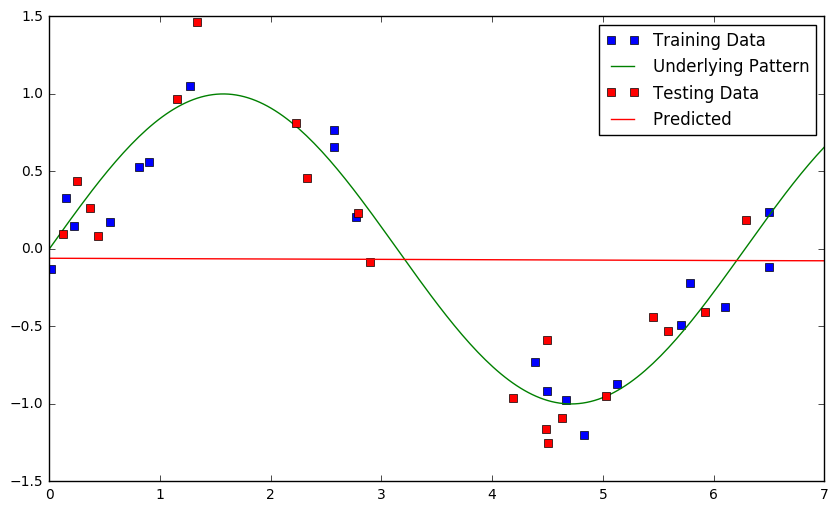

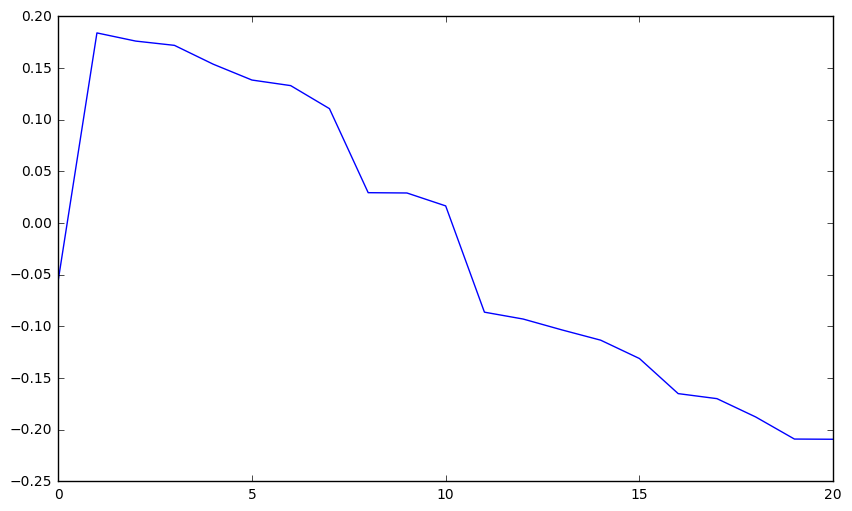

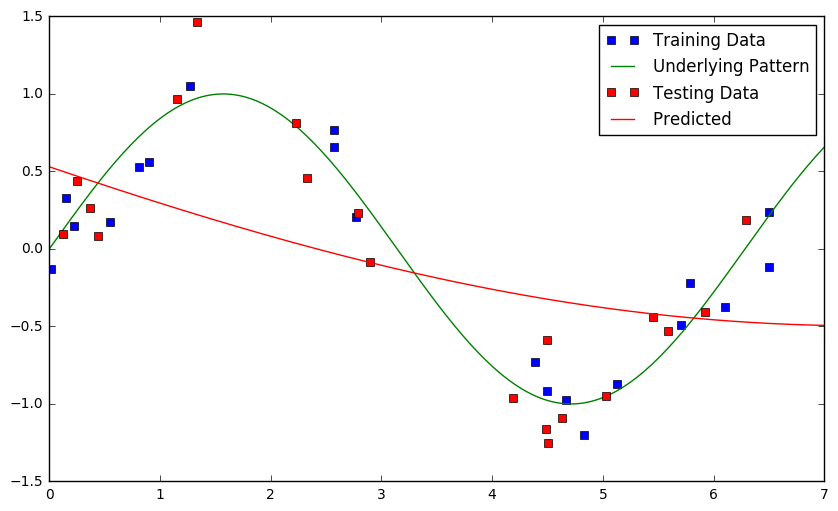

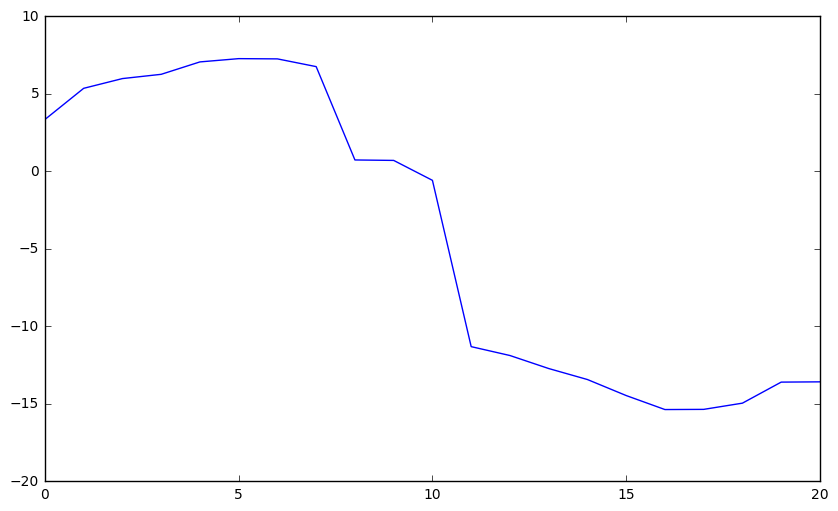

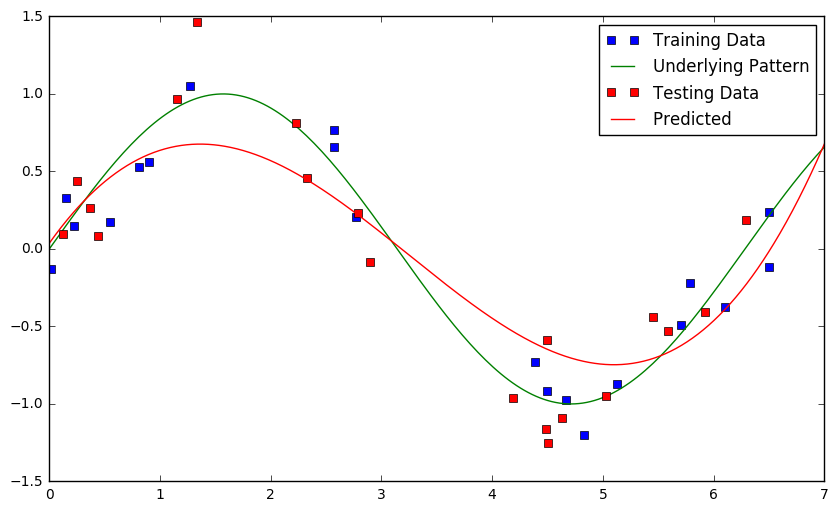

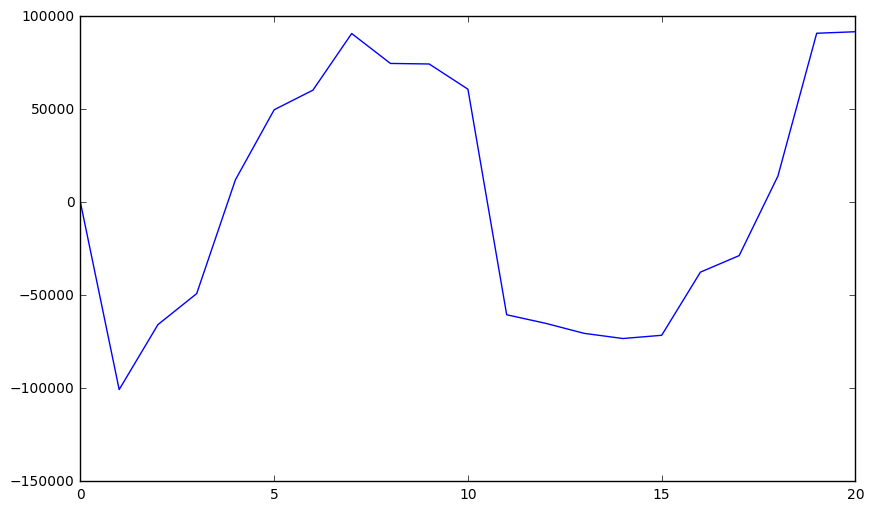

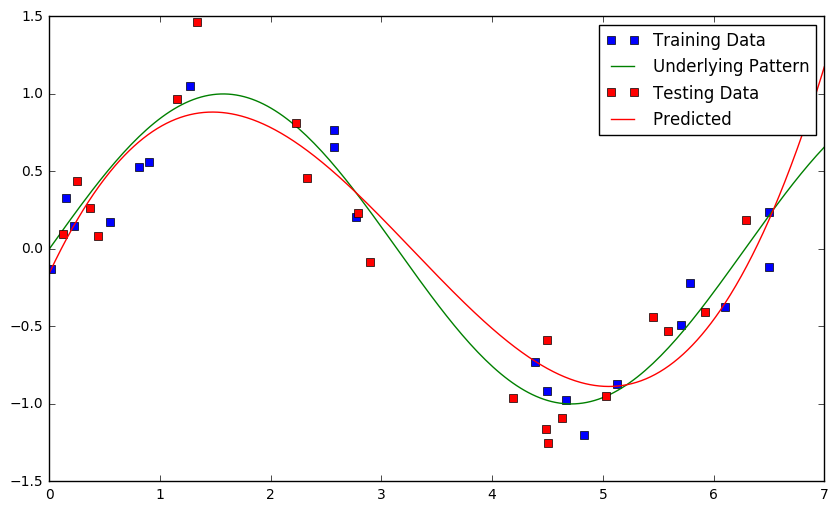

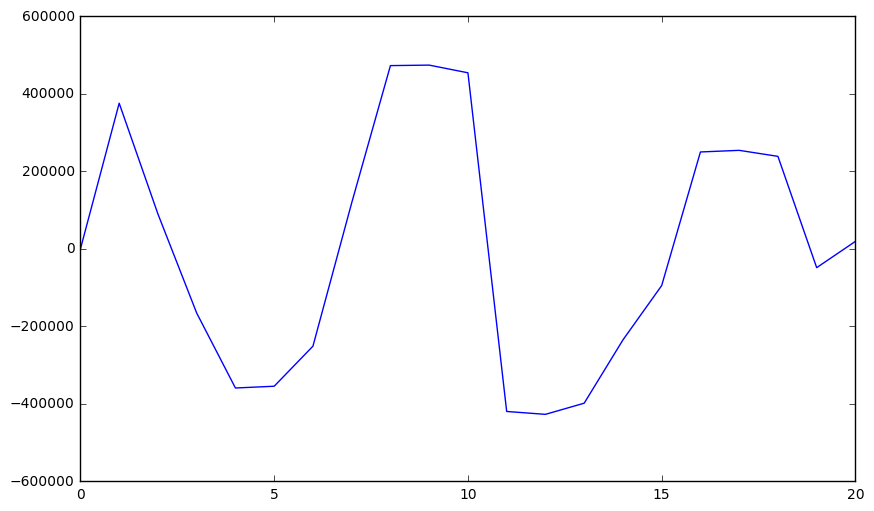

In [44]:
for alpha in range(1,20,5):
    pred, w = rbfwdr(xtr, ttr, xte, 10, 10**(-alpha))

We can see that as alpha gets smaller and smaller, the smoothing effect is reduced. This is because the effect of large weights are having less effect on the error function. Over the range the predictions begins to fit the data better.

### Choosing $\alpha$

Assuming that you have a reasonable value for $\sigma$, it remains to choose $\alpha$ which is done by cross validation.   The data set <code>nonlinreg-train.txt</code> and <code>nonlinreg-test.txt</code> contain features and targets for another one-dimensional, nonlinear regression problem.  Use your <code>rbfwdr</code> function to make predictions for these data and choose $\alpha$ by estimating the generalisation error with cross validation.  You will need to evaluate the training and validation errors for $\alpha$ over a wide range, perhaps $10^{-5}$ to $10^1$; the function <code>logspace</code> is useful for producing equally spaced values: 

    alpha = logspace(-5, 1, 20)
    print(alpha)
    
    [  1.00000000e-05   2.06913808e-05   4.28133240e-05   8.85866790e-05
       1.83298071e-04   3.79269019e-04   7.84759970e-04   1.62377674e-03
       3.35981829e-03   6.95192796e-03   1.43844989e-02   2.97635144e-02
       6.15848211e-02   1.27427499e-01   2.63665090e-01   5.45559478e-01
       1.12883789e+00   2.33572147e+00   4.83293024e+00   1.00000000e+01]

Plot a graph of the training and validation errors versus $\alpha$ (<code>semilogx</code> is useful) and so choose the best $\alpha$ as the one that minimises the validataion error.

You probably won't need to use leave-one-out cross validation, 5-fold cross validation will probably be sufficient.  You can either write your own or you could use the functions in scikit-learn; see <http://scikit-learn.org/stable/modules/cross_validation.html>.  

The following cell loads the data

In [83]:
name = 'nonlinreg-train.txt'
try: 
    X = loadtxt(name)
except:
    wget.download('http://empslocal.ex.ac.uk/~reverson/ECM3420/'+name)
    X = loadtxt(name)
print(X.shape)
xtr = X[:,0]
ttr = X[:,1]

name = 'nonlinreg-test.txt'
try: 
    X = loadtxt(name)
except IOError:
    wget.download('http://empslocal.ex.ac.uk/~reverson/ECM3420/'+name)
    X = loadtxt(name)
print(X.shape)
xte = X[:,0]
tte = X[:,1]

from sklearn.cross_validation import KFold

(50, 2)
(500, 2)


Evaluate your final, cross validated model on the actual test data.  There are many more examples of this so you should get an accurate result, but make sure you haven't used the test data during training.

In [84]:
def errVal( sigma, alpha_list ):
    cv = KFold(len(xtr), n_folds=5, shuffle=True)
    training_error = []
    validation_error = []
    for alpha in alpha_list:
        errtr = 0
        errte = 0
        for train, validation in cv:
            pred_xtr, w = rbfwdr( xtr[train], ttr[train], xtr[train], sigma, 10**(-alpha), pplot=False)
            pred_xte, w = rbfwdr( xtr[train], ttr[train], xtr[validation], sigma, 10**(-alpha), pplot=False)

            sum_xtr = 0
            sum_xte = 0
            for i in range( len(pred_xtr) ):
                sum_xtr += (abs( pred_xtr[i] - ttr[train][i] ))**2
            for i in range( len(pred_xte) ):
                sum_xte += (abs( pred_xte[i] - ttr[validation][i] ))**2

            errtr += sqrt(sum_xtr/len(pred_xtr))
            errte += sqrt(sum_xte/len(pred_xte))

        training_error.append( errtr/5 )
        validation_error.append( errte/5 )
        
    return alpha_list[validation_error.index( min(validation_error) )], training_error, validation_error

Value of alpha at minimun validation error:  4.83293023857


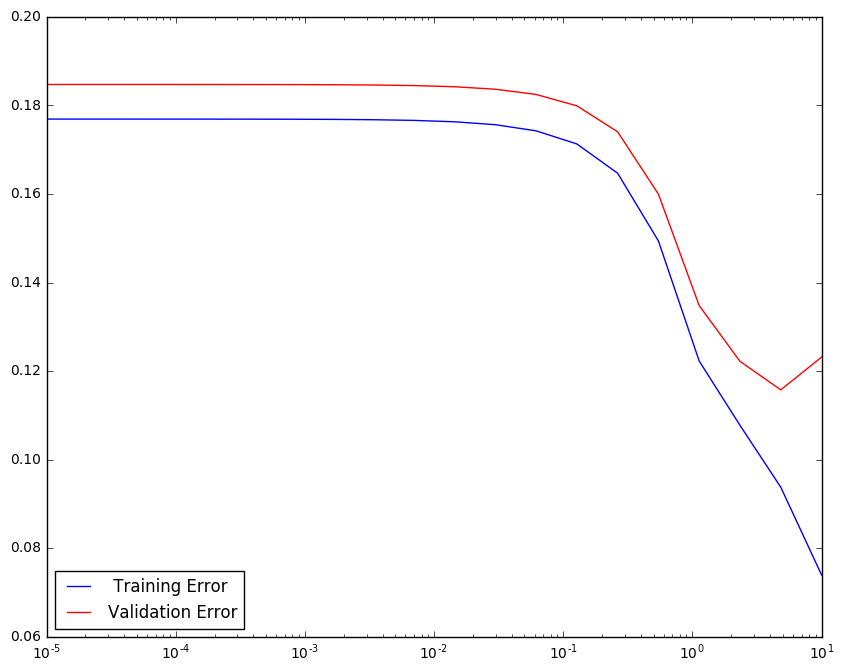

In [49]:
alpha_list = logspace(-5, 1, 20)

alpha, training_error, validation_error = errVal( 2, alpha_list )

print( 'Value of alpha at minimun validation error: ', alpha )

figure()
semilogx()
plot( alpha_list, training_error, 'b', label=' Training Error')
plot( alpha_list, validation_error, 'r', label='Validation Error')
legend( loc=3 )

Upto now we have used a value of $\sigma$ chosen by rule-of-thumb or by a bit of experimentation.  A nicer way to choose it would be by cross validation too.  However, since $\sigma$ and $\alpha$ interact, you really need to find the best value for them both jointly, by searching a grid of possible $(\sigma, \alpha)$ combinations.

Do this for these data and plot (<code>pcolor</code>) the validation error versus 
$\sigma$ and $\alpha$.  Evaluate the performance of your optimised model on the test data.

(There is machinery in sklearn to help with this, but it involves wrapping your RBF network in a class and providing some methods -- see [sklearn.model_selection.GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).  It's probably easiest just to write generate your own $(\sigma, \alpha)$ pairs using nested loops.)

(1.0, 100.0, 1.0000000000000001e-05, 10.0)

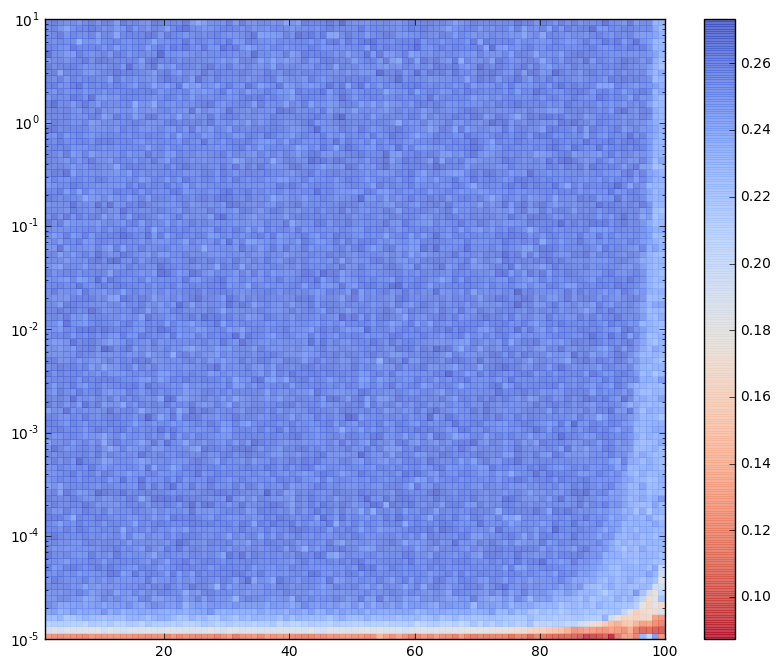

In [85]:

# I'm sorry I used large n and m but it looks so pretty

alpha_list = logspace(-5, 1, 100)
sigma_list = linspace( 1, 100, 100)

pred = zeros((100,100))
for s_index, sigma in enumerate(sigma_list):
    for a_index, alpha in enumerate(alpha_list):
        cv = KFold(len(xtr), n_folds=5, shuffle=True)
        errte = 0
        for train, validation in cv:
            pred_xte, w = rbfwdr( xtr[train], ttr[train], xtr[validation], sigma, 10**(-alpha), pplot=False)
            sum_xte = 0
            for i in range( len(pred_xte) ):
                sum_xte += (abs( pred_xte[i] - ttr[validation][i] ))**2
            errte += sqrt(sum_xte/len(pred_xte))
        pred[s_index][a_index] = errte/5
        

pcolor(sigma_list, alpha_list, pred, cmap=cm.coolwarm_r, alpha=0.8)
colorbar()
semilogy()
axis('tight')